In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
delivary = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')
mas = pd.read_csv('most_runs_average_strikerate.csv')
player = pd.read_excel('Players.xlsx','Sheet1')
team = pd.read_csv('teams.csv')
team_home = pd.read_csv('teamwise_home_and_away.csv')

In [3]:
sns.set_style('darkgrid')
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
match.dl_applied.nunique()

2

In [6]:
match['bat_first_win'] = match['win_by_runs'].apply(lambda x: 'yes' if x != 0 else 'no')

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bat_first_win', ylabel='count'>

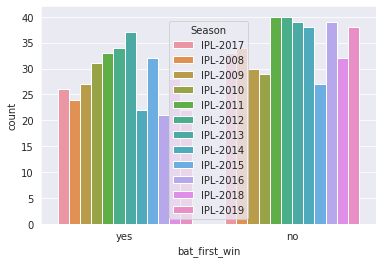

In [7]:
sns.countplot('bat_first_win',hue='Season',data=match)

team that batted first had a lower chance to win

In [8]:
match['toss_winner_win'] = match.apply(lambda x: 'yes' if x['toss_winner']==x['winner'] else 'no', axis=1)

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_winner_win', ylabel='count'>

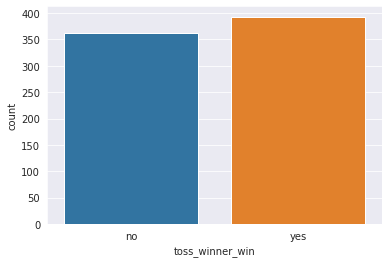

In [9]:
sns.countplot('toss_winner_win',data=match)

toss winner team had a higher chance of winning 

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

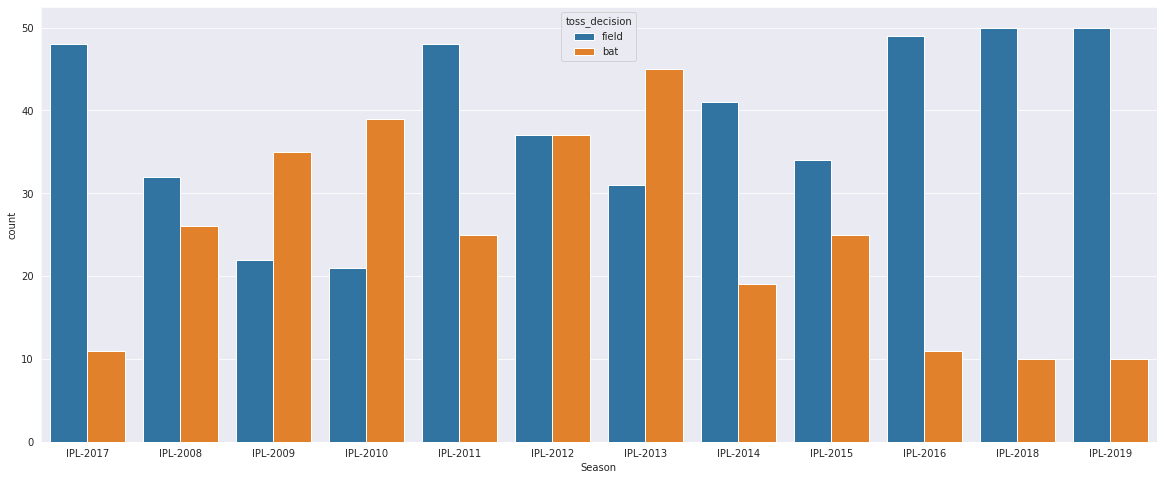

In [10]:
plt.figure(figsize=(20,8))
sns.countplot('Season',hue='toss_decision',data=match)

we can see in most of the ipl season teams tend to choose fielding first as it had higher chance of winning and also it was easy to chase when one had a fixed target

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

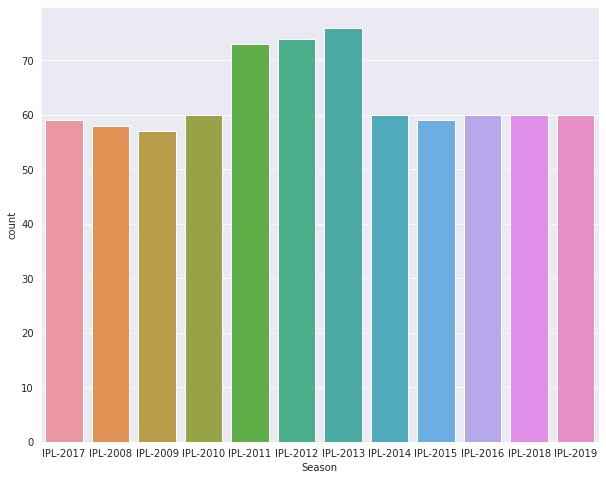

In [11]:
plt.figure(figsize=(10,8))
sns.countplot('Season',data=match)

<AxesSubplot:xlabel='count', ylabel='city'>

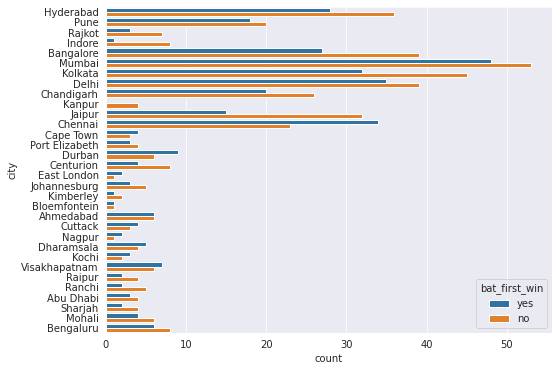

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(y='city',hue='bat_first_win',data=match)

almost in every cities number of bat first winner is lower than field first winner. but there is exception in chennai and Durban and viskhapatnam. Number of bat first winner is higher in these cities

In [13]:
name=[]
count=[]
x = dict(match.groupby('player_of_match')['id'].count())
x=sorted(x.items(),key=lambda x: x[1])

for i,j in x[::-1]:
    if j>5:
        name.append(i)
        count.append(j)


<AxesSubplot:>

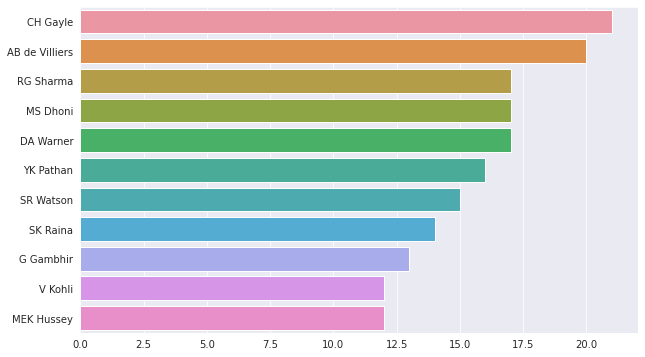

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(y=name[:11],x=count[:11])

from above we can see, chris gayle holds the record of becoming the player of the match most times

<AxesSubplot:xlabel='count', ylabel='winner'>

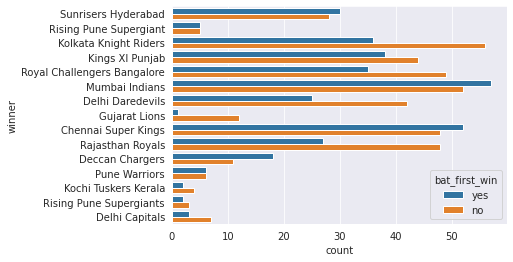

In [15]:
sns.countplot(y='winner',data=match,hue='bat_first_win')

except Mumbai indians, other team won most times when they chose field first. In case of Delhi,Gujarat, rajasthan, number of bat first win is two times lower than number of field first win

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

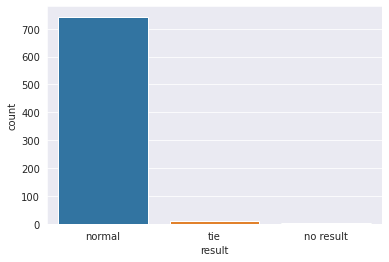

In [16]:
sns.countplot('result',data=match)

In [17]:
dl_case = match[match['dl_applied']==1]

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bat_first_win', ylabel='count'>

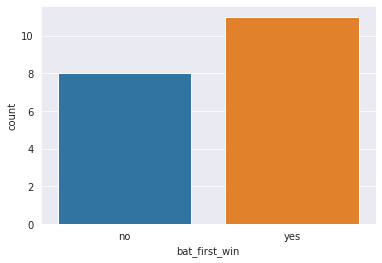

In [18]:
sns.countplot('bat_first_win',data=dl_case)

<AxesSubplot:xlabel='batsman', ylabel='total_runs'>

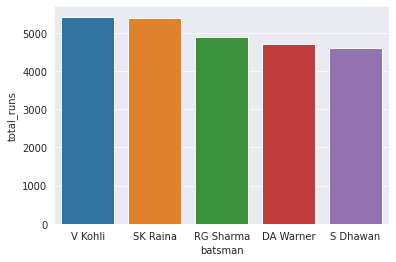

In [39]:
sns.barplot('batsman','total_runs',data=mas.head())

<AxesSubplot:xlabel='Country'>

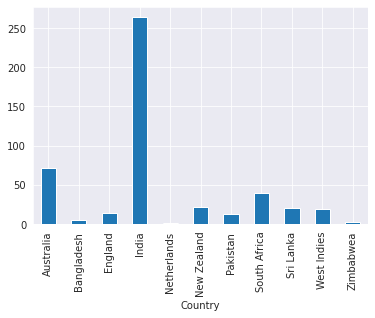

In [46]:
player.groupby('Country').Player_Name.count().plot(kind='bar')

In [21]:
team

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [22]:
team_home.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


<AxesSubplot:xlabel='home_win_percentage', ylabel='team'>

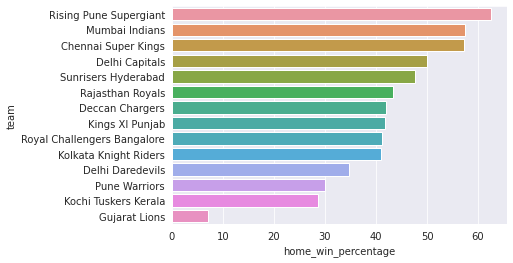

In [23]:
sns.barplot(y='team',x='home_win_percentage',data=team_home)

<AxesSubplot:xlabel='away_win_percentage', ylabel='team'>

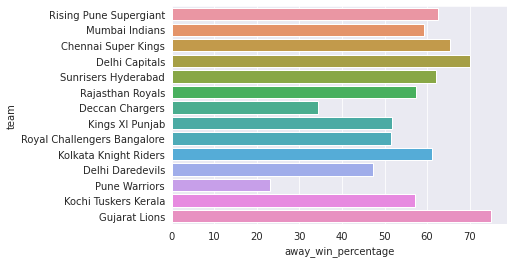

In [24]:
sns.barplot(y='team',x='away_win_percentage',data=team_home)

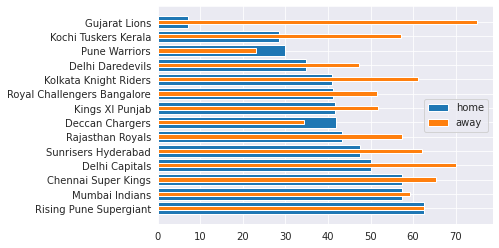

In [25]:
plt.barh(team_home.team,team_home.home_win_percentage,label='home')
plt.barh(team_home.team,team_home.away_win_percentage,height = .3,label='away')
plt.legend()

percentage of winning in home is lower than percentage of winning away in case of almost every team except Pune,and Deccan Chargers

In [26]:
delivary.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [27]:
delivary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [28]:
delivary.match_id.nunique()

756

In [29]:
run = {
    'single': 1,
    'double': 2,
    'three': 3,
    'four' : 4,
    'six': 6,
}
run_count = {}
for i,j in run.items():
    run_count[i] = delivary[delivary.batsman_runs == j].match_id.count()

In [30]:
delivary[delivary.batsman_runs == 6].match_id.count()

8170

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

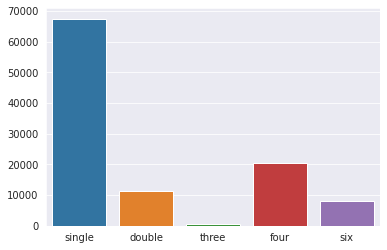

In [31]:
sns.barplot(list(run_count.keys()),list(run_count.values()))

In [32]:
new = pd.DataFrame(delivary.groupby(['batsman_runs','batsman'],as_index=False).match_id.count())

In [33]:
run = ['dot','one','two','three','four','five','six','seven']
m = 0
for i,j in new.groupby('batsman_runs'):
    df = pd.DataFrame(j.sort_values(by='match_id',ascending=False))
    run[m] = df[['batsman','match_id']].head(5)
    m=m+1

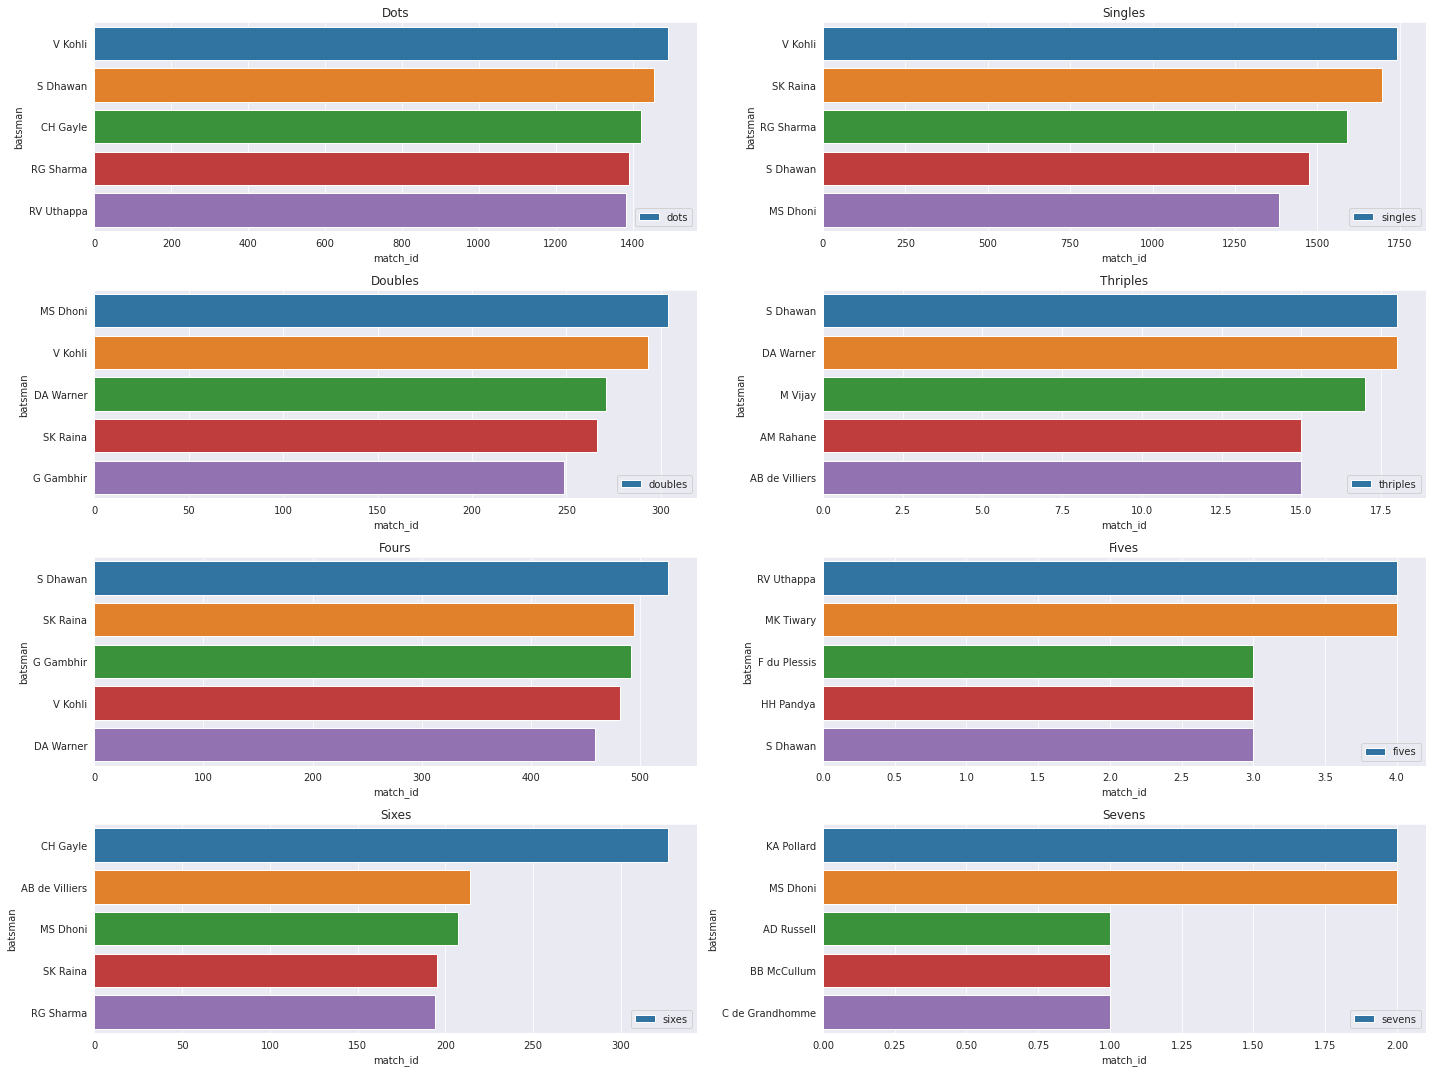

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
plt.title('Dots')
sns.barplot(y=run[0]['batsman'],x=run[0]['match_id'],label='dots')
plt.legend()
plt.subplot(4,2,2)
plt.title('Singles')
sns.barplot(y=run[1]['batsman'],x=run[1]['match_id'],label='singles')
plt.legend()
plt.subplot(4,2,3)
plt.title('Doubles')
sns.barplot(y=run[2]['batsman'],x=run[2]['match_id'],label='doubles')
plt.legend()
plt.subplot(4,2,4)
plt.title('Thriples')
sns.barplot(y=run[3]['batsman'],x=run[3]['match_id'],label='thriples')
plt.legend()
plt.subplot(4,2,5)
plt.title('Fours')
sns.barplot(y=run[4]['batsman'],x=run[4]['match_id'],label='fours')
plt.subplot(4,2,6)
plt.title('Fives')
sns.barplot(y=run[5]['batsman'],x=run[5]['match_id'],label='fives')
plt.legend()
plt.subplot(4,2,7)
plt.title('Sixes')
sns.barplot(y=run[6]['batsman'],x=run[6]['match_id'],label='sixes')
plt.legend()
plt.subplot(4,2,8)
plt.title('Sevens')
sns.barplot(y=run[7]['batsman'],x=run[7]['match_id'],label='sevens')
plt.tight_layout()
plt.legend()

these are the histogram chart of top batsman taking singles,double,thripls, fives,sevens and hitting fours and sixes and also top five batsman who played dots